In [2]:
import pandas as pd
import numpy as np
import pathlib
# from dataset_loader import load_dataframes
import os

In [2]:
final_dt_df, final_w2v_df, final_nv_df, final_fin_df, final_in_df, final_se_df, all_df = load_dataframes()

In [10]:
print('drug target:', (final_dt_df.shape[1]-2))
print('word2vec:', (final_w2v_df.shape[1]-2))
print('fingerprint:', (final_fin_df.shape[1]-2))
print('node2vec:', (final_nv_df.shape[1]-2))
print('indication:', (final_in_df.shape[1]-2))
print('side effect:', (final_se_df.shape[1]-2))
print('--------------------------------------------')
print('drug target:', (final_dt_df.shape[0]))
print('word2vec:', (final_w2v_df.shape[0]))
print('fingerprint:', (final_fin_df.shape[0]))
print('node2vec:', (final_nv_df.shape[0]))
print('indication:', (final_in_df.shape[0]))
print('side effect:', (final_se_df.shape[0]))

drug target: 790
word2vec: 200
fingerprint: 167
node2vec: 128
indication: 1513
side effect: 3256
--------------------------------------------
drug target: 760
word2vec: 614
fingerprint: 627
node2vec: 752
indication: 383
side effect: 389


In [2]:
base_dir = str(pathlib.Path().resolve())
in_path = f'{base_dir}/new_edges/new_ddc.csv'
df = pd.read_csv(in_path)
#############################################################
drug_pair_dict = dict()
for row in df.values:
    if row[2] == '-':
        pass
    else:
        pair = f'{row[4]} - {row[5]}'
        pair2 = f'{row[5]} - {row[4]}' 
        if pair in list(drug_pair_dict.keys()) or pair2 in list(drug_pair_dict.keys()):
            try:
                count = drug_pair_dict[pair]
                count += 1
                drug_pair_dict[pair] = count
            except Exception as e:
                count = drug_pair_dict[pair2]
                count += 1
                drug_pair_dict[pair2] = count
        else:
            drug_pair_dict[pair] = 1
#############################################################
d1_list = []
d2_list = []
pair_count = []
for key in list(drug_pair_dict.keys()):
    ds = key.split(' - ')
    d1_list.append(ds[0])
    d2_list.append(ds[1])
    pair_count.append(drug_pair_dict[key])
#############################################################
if 'new_edges' not in os.listdir(f'{base_dir}/'):
    os.mkdir( f'{base_dir}/new_edges/')
#############################################################
new_df = pd.DataFrame()
new_df['d1'] = d1_list
new_df['d2'] = d2_list
new_df['count'] = pair_count
new_df.sort_values('count', ascending=False, inplace=True)
new_df.to_csv(f'{base_dir}/new_edges/new_ddc_unique.csv', index=False)

In [38]:
new_df

,d1,d2,count
14,Lamivudine,Delavirdine,8
11,Lamivudine,Rifapentine,8
10,Lamivudine,Indinavir,7
18,Lamivudine,Darunavir,7
12,Lamivudine,Rifabutin,6
...,...,...,...
267,Valproic,Carmustine,1
266,Aspirin,Furosemide,1
265,Aspirin,Ketoprofen,1
263,Aspirin,Ergotamine,1


# loading all edges with drug names (not ddc codes)

In [20]:
final_dt_df, final_w2v_df, final_nv_df, final_fin_df, final_in_df, final_se_df, all_df = load_dataframes()

out_dir = str(pathlib.Path().resolve())
out_path = f'{out_dir}/datasets/dcdb.csv'

if 'dcdb.csv' not in os.listdir(f'{out_dir}/datasets/'):
    src_path = f'{out_dir}/datasets/COMPONENTS.txt'
    f = open(src_path, 'r')

    csv_1 = []
    csv_2 = []

    for line in f.readlines():
        each = line.split(' ')[0].split('\t')
        csv_1.append(each[0])
        csv_2.append(each[1])

    print(len(csv_1))
    print(len(csv_2))

    csv_1 = np.array(csv_1[1:])
    csv_2 = np.array(csv_2[1:])

    csv_1 = np.reshape(csv_1, (len(csv_1), 1))
    csv_2 = np.reshape(csv_2, (len(csv_2), 1))

    drug_df = pd.DataFrame(np.concatenate([csv_1, csv_2], axis=1), columns=['drug', 'name'])
    drug_df

    drug_df.to_csv(out_path, index=False)
else:
    drug_df = pd.read_csv(out_path)

drug_names = dict()

for drug in drug_df.values:
    drug = list(drug)
    drug_names[drug[0]] = drug[1]

all_edges = []

for edge in all_df.values:
    if list(edge) not in all_edges and [edge[1], edge[0]] not in all_edges:
        all_edges.append(list(edge))
        all_edges.append([edge[1], edge[0]])

d1_list = []
d2_list = []
t_list = []
for edge in all_edges:
    d1 = drug_names[edge[0]]
    d2 = drug_names[edge[1]]

    e1 = f'{d1}-{d2}'
    e2 = f'{d2}-{d1}'

    if e1 in t_list or e2 in t_list:
        pass
    else:
        t_list.append(e1)
        d1_list.append(d1)
        d2_list.append(d2)

df_all_names = pd.DataFrame()
df_all_names['d1'] = d1_list
df_all_names['d2'] = d2_list
df_all_names.to_csv(f'{out_dir}/all_edges_names.csv', index=False)

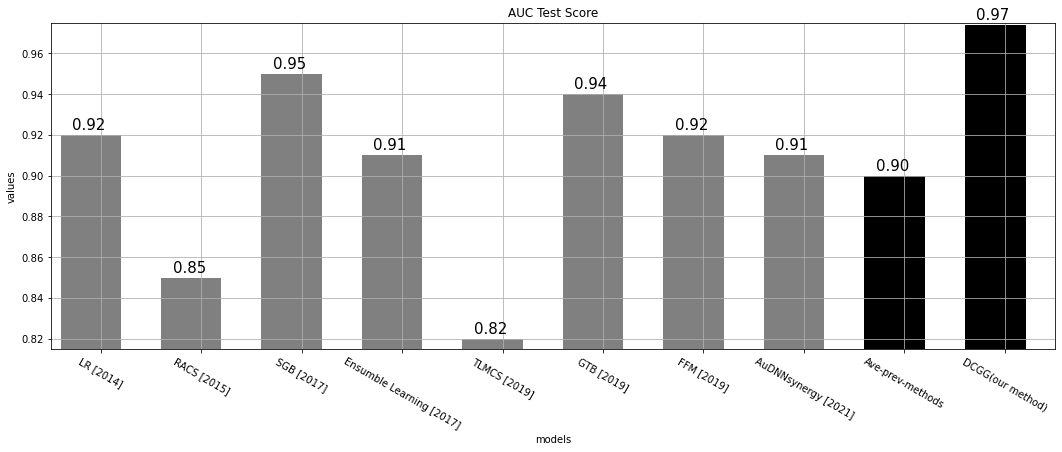

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_comparison(roc_auc_score):
    base_dir = str(pathlib.Path().resolve())
    method_names = ['Huang et al[2014]', 'Sun et al.[2015]', 'Xu et al.[2017]', 
    'Shi et al.(Ensumble learning)[2017]', 'Shi et al.(TLMCS)[2019]', 'Liu et al.[2019]', 'Zhang et al.[2019]', 'Zhang et al.[2021]', 
    'Ave-prev-methods', 'DCGG(our method)']

    method_names = ['LR [2014]', 'RACS [2015]', 'SGB [2017]', 'Ensumble Learning [2017]', 'TLMCS [2019]','GTB [2019]', 
    'FFM [2019]', 'AuDNNsynergy [2021]', 'Ave-prev-methods', 'DCGG(our method)']
    scores = [0.92, 0.85, 0.95, 0.91, 0.82, 0.94, 0.92, 0.91, 0.90, roc_auc_score]

    plt.figure(figsize=(18, 6))

    d = {'models': method_names, 'values': scores}
    df = pd.DataFrame(d, columns=['models', 'values'])
    plots = sns.barplot(x='models', y='values', data=df, color='gray')

    width = 0.6

    plt.title('AUC Test Score')
    for i, bar in enumerate(plots.patches):
        # plots.annotate(format(bar.get_height(), '.3f'),
        plots.annotate(format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center', 
        size=15, xytext=(-12, 10),
        textcoords='offset points')
        bar.set_width(width)
        if i == len(method_names)-1 or i == len(method_names)-2:
            bar.set_color('black')

    
    for item in plots.get_xticklabels():
        item.set_rotation(-30)

    plt.ylim(0.815, 0.975)
    plt.grid()

    if 'output_figs' not in os.listdir(base_dir):
        os.mkdir(f'{base_dir}/output_figs/')
    plt.savefig(f'{base_dir}/output_figs/barplot_comparison.eps', format='eps')
    plt.savefig(f'{base_dir}/output_figs/barplot_comparison.png', dpi=500)
    plt.show()

plot_comparison(0.974)

In [19]:
import numpy as np
l = [0.92, 0.85, 0.95, 0.82, 0.91, 0.94, 0.92, 0.91]
l = np.array(l)
ave = np.average(l)
ave = format(ave, '.3f')
print(ave)

0.903


In [3]:
base_dir = str(pathlib.Path().resolve())
in_path = f'{base_dir}/new_edges/new_ddc_unique_with_atc.csv'
df = pd.read_csv(in_path)

In [4]:
df

,d1,d2,count,atc1,atc2,atc1_first,atc2_first
0,Lamivudine,Delavirdine,8,J05AF05,J05AG02,J,J
1,Lamivudine,Rifapentine,8,J05AF05,J04AB05,J,J
2,Lamivudine,Indinavir,7,J05AF05,J05AE02,J,J
3,Lamivudine,Darunavir,7,J05AF05,J05AE10,J,J
4,Lamivudine,Rifabutin,6,J05AF05,J04AB04,J,J
...,...,...,...,...,...,...,...
639,Valproic,Carmustine,1,N03AG01,L01AD01,N,L
640,Aspirin,Furosemide,1,A01AD05,C03CA01,A,C
641,Aspirin,Ketoprofen,1,A01AD05,M01AE03,A,M
642,Aspirin,Ergotamine,1,A01AD05,N02CA01,A,N


In [7]:
drugs = set()
for row in df.values:
    d1 = row[0]
    d2 = row[1]
    drugs.add(d1)
    drugs.add(d2)
print(len(drugs))

455


In [38]:
all_te_list = [
[0.929, 0.861, 0.757, 0.901, 0.802, 0.875, 0.854],
[0.939, 0.904, 0.872, 0.922, 0.895, 0.938, 0.912],
[0.974, 0.943, 0.905, 0.968, 0.916, 0.972, 0.946],
[0.907, 0.836, 0.767, 0.867, 0.781, 0.836, 0.832],
[0.944, 0.899, 0.71, 0.918, 0.843, 0.916, 0.872],
[0.955, 0.917, 0.792, 0.938, 0.864, 0.911, 0.896],
[0.96 , 0.94, 0.848, 0.953, 0.905, 0.944, 0.925],
[0.944, 0.9, 0.807, 0.924, 0.858, 0.913, 0.891]]

# all_te_list = [[0.929, 0.861, 0.757, 0.901, 0.802, 0.875],
# [0.939, 0.904, 0.872, 0.922, 0.895, 0.938],
# [0.974, 0.943, 0.905, 0.968, 0.916, 0.972],
# [0.907, 0.836, 0.767, 0.867, 0.781, 0.836],
# [0.944, 0.899, 0.71, 0.918, 0.843, 0.916],
# [0.955, 0.917, 0.792, 0.938, 0.864, 0.911],
# [0.96 , 0.94, 0.848, 0.953, 0.905, 0.944]]

# ave = 0
# for i in range(len(all_te_list)):
#     row = all_te_list[i]
#     for j in range(len(all_te_list[0])):
#         ave += all_te_list[i][j]
# ave /= (len(all_te_list[0]) * len(all_te_list))
# ave = float("{:.3f}".format(ave))
# print(ave)
# col = [0 for i in range(len(all_te_list[0]))]
# for i in range(len(all_te_list)):
#     row = all_te_list[i]
#     for j in range(len(all_te_list[0])):
#         col[j] += all_te_list[i][j]
#     # col[i] /= len(all_te_list[0])
#     # print(col[i])
# # for c in col:
# # ave = float("{:.3f}".format(ave))
# # print(ave)
# for c in col:
#     c = c/len(all_te_list)
#     c = float("{:.3f}".format(c))
#     print(c)


                   M1(GCN)       M2(SAGE)        M3(GAT)     M4(SAGE-GCN)   M5(GAT-SAGE)    M6(GCN-GAT)   ave-of-models 
  drug-target       0.929          0.861          0.757          0.901          0.802          0.875          0.854     
   word2vec         0.939          0.904          0.872          0.922          0.895          0.938          0.912     
   nord2vec         0.974          0.943          0.905          0.968          0.916          0.972          0.946     
  figerprint        0.907          0.836          0.767          0.867          0.781          0.836          0.832     
  indication        0.944          0.899          0.71           0.918          0.843          0.916          0.872     
  side-effect       0.955          0.917          0.792          0.938          0.864          0.911          0.896     
 all-features       0.96           0.94           0.848          0.953          0.905          0.944          0.925     
ave-of-features     0.944       

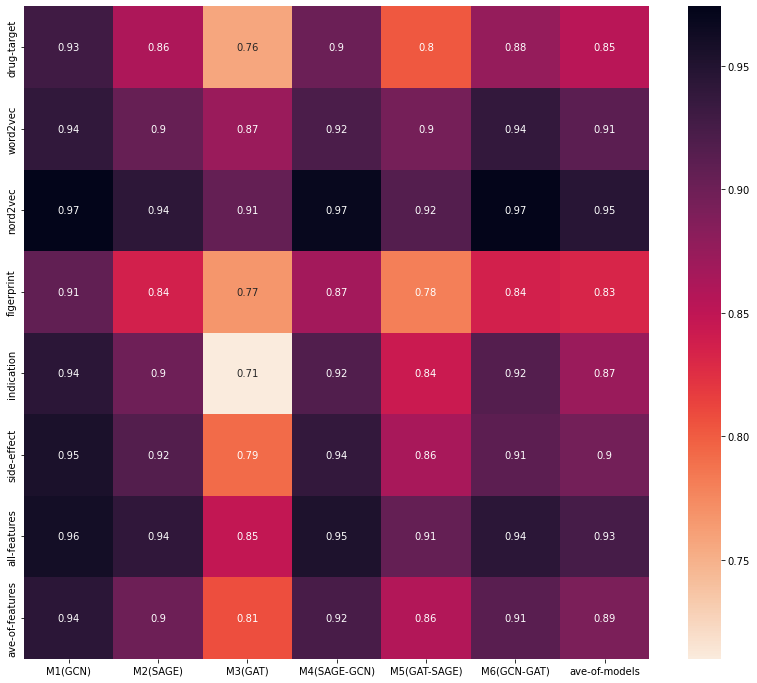

In [42]:
model_names = ['M1(GCN)', 'M2(SAGE)', 'M3(GAT)', 'M4(SAGE-GCN)', 'M5(GAT-SAGE)', 'M6(GCN-GAT)', 'ave-of-models']
feature_names = ['drug-target', 'word2vec', 'nord2vec', 'figerprint', 'indication', 'side-effect', 'all-features', 'ave-of-features']
colors = ['black', 'gray', 'black', 'gray', 'black', 'gray', 'black']
method_names = []
all_test = []

ave_list = []
for i in range(len(all_te_list)):
    ave = 0
    for j in range(len(all_te_list[0])):
        ave += all_te_list[i][j]
    ave = ave / len(all_te_list[0])
    ave_list.append(ave)
# calculating average on the models
ave_list = []
scores = []
for i in range(len(all_te_list)):
    ave = 0
    for j in range(len(all_te_list[0])):
        ave += all_te_list[i][j]
    ave = ave / len(all_te_list[0])
    ave_list.append(ave)
# printing models in a table visualization
print(' '* 15, end='')
for i, name in enumerate(model_names):
    print(f'{name:^15}', end='')
print()
for i in range(len(all_te_list)):
    model = feature_names[i]
    print(f'{feature_names[i]:^15}', end='')
    scores_list = []
    for j in range(len(all_te_list[0])):
        string = float("{:.3f}".format(all_te_list[i][j]))
        all_test.append(string)
        feature = model_names[j]
        print(f'{string:^15}' , end='')
        method_names.append(f'{feature} on {model}')
        scores_list.append(string)
    # scores_list.append(ave_list[i])
    scores.append(scores_list)
    print()
# barplot visualization
# plotter(all_test, method_names, colors)
scores = np.array(scores)
scores = np.reshape(scores, (8, 7))
# computing overall score
heat_scores = scores[:]
sum = 0
for i in range(len(heat_scores)):
    for j in range(len(heat_scores[0])):
        sum += heat_scores[i][j]
# print('average AUC score:', sum / 42)
# Heatmap visualization
cmap = sns.cm.rocket_r

plt.figure(figsize=(14, 12))
ax = sns.heatmap(scores, annot=True, cmap=cmap)
ax.set_xticklabels(model_names)
ax.set_yticklabels(feature_names)

if 'output_figs' not in os.listdir(base_dir):
    os.mkdir(f'{base_dir}/output_figs/')

plt.savefig(f'{base_dir}/output_figs/heatmap_result.eps', format='eps')
plt.savefig(f'{base_dir}/output_figs/heatmap_result.png', dpi=500)
plt.show()

In [4]:
from utils.util_functions import train_model_on_folds, device_finder, train_model_on_folds_and_decode_all
from utils.graph_data_creater import create_graph_data_with_different_features
from utils.splitters import k_fold_edge_split
from model import Net

data_list, reverse_node_dict_list = create_graph_data_with_different_features(with_reverse=True)
[data_dt, data_w2v, data_n2v, data_fin, data_in, data_se] = data_list
data_n2v

Data(x=[752, 128], edge_index=[2, 3406])

Epoch: 100, Train Loss: 0.423805, Val Auc: 0.979671, Test Auc: 0.982974


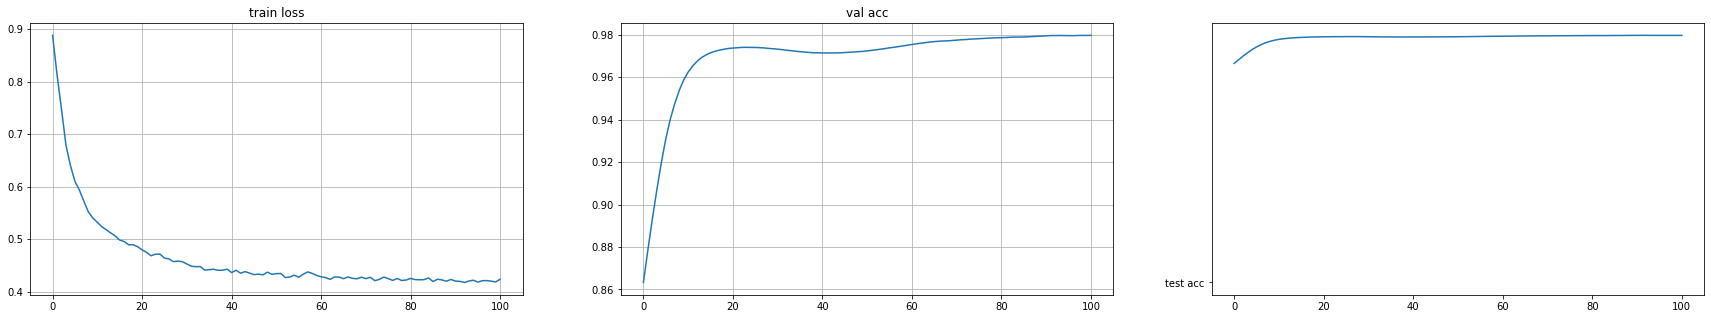

Epoch: 100, Train Loss: 0.417509, Val Auc: 0.979491, Test Auc: 0.982955


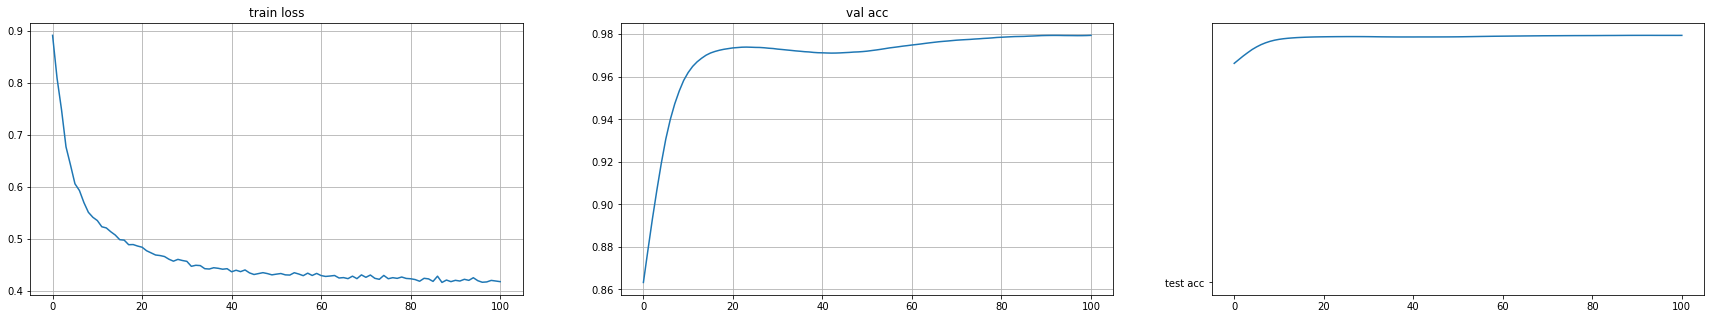

Epoch: 100, Train Loss: 0.431251, Val Auc: 0.970182, Test Auc: 0.975522


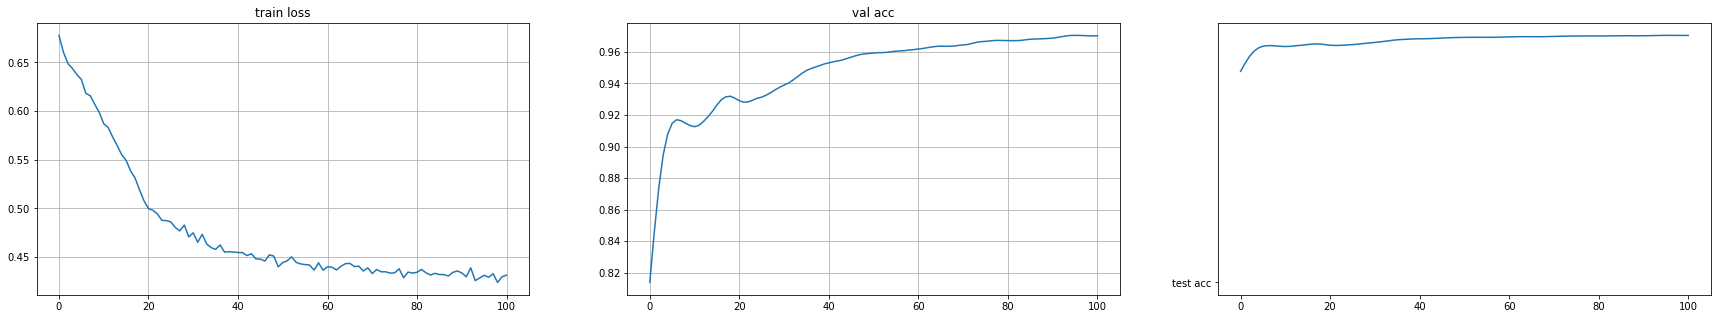

Epoch: 100, Train Loss: 0.432958, Val Auc: 0.969664, Test Auc: 0.975664


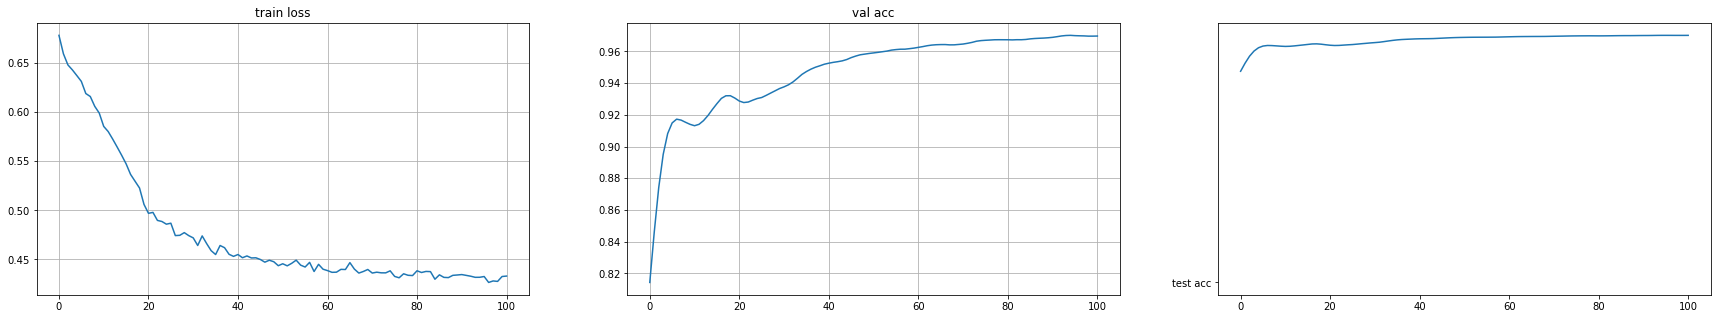

In [6]:
folds = k_fold_edge_split(data_n2v, only_upper_triangular_portion=False)

device = device_finder()

in_channels = folds[0].num_features
hid_channels = 128
out_channels = 64

t_list = []
v_list = []
te_list = []

for index in range(7, 13):
    # for index in range(0, 3):
    train_loss, val_auc, test_auc, model, prob_adj = train_model_on_folds_and_decode_all(folds=folds, data=data_n2v,
                                num_epochs=101, index=index, in_channels=in_channels, hid_channels=hid_channels, 
                                out_channels=out_channels, device=device, model_class=Net, lr=0.0005, verbose=0)   
    train_loss, val_acc, test_acc, model, val_aupr, test_aupr, val_fscore, test_fscore = train_model_on_folds(folds=folds, num_epochs=101, index=index, in_channels=in_channels, hid_channels=hid_channels, out_channels=out_channels, device=device, model_class=Net, lr=0.0005, verbose=0)
    t_list.append(train_loss)
    v_list.append(val_acc)
    te_list.append(test_acc)
